[matplotlib.cm](https://matplotlib.org/3.1.0/api/cm_api.html)
[colormap_reference](https://matplotlib.org/gallery/color/colormap_reference.html)
[RGBA Colors](https://www.w3schools.com/css/css3_colors.asp)

# CIFAR10 Download

In [1]:
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
cls_names = ['airplane', 
             'automobile', 
             'bird', 
             'cat', 
             'deer', 
             'dog', 
             'frog', 
             'horse', 
             'ship', 
             'truck']

In [3]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
print(x_train.dtype)
print(y_train.dtype)
print(x_test.dtype)
print(y_test.dtype)

uint8
uint8
uint8
uint8


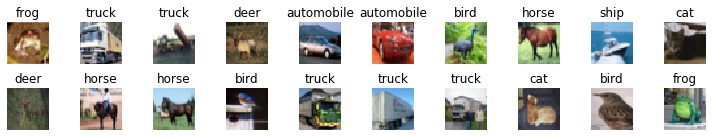

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10,2))
for i in range(2):
    for j in range(10):
        axes[i, j].imshow(x_train[i*10+j], cmap=plt.cm.gray) 
        axes[i, j].set_title('{}'.format(cls_names[y_train[i*10+j, 0]]))
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

In [7]:
# data loading for transfer learning
import tensorflow as tf
import numpy as np
import copy
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Inception needs pixels to be between 0 and 255
# x_train, x_test = x_train / 255. , x_test / 255.
x_train, x_test = x_train.astype(np.float32), x_test.astype(np.float32)
y_train, y_test = y_train.reshape((-1,)), y_test.reshape((-1,))
y_train_cls = copy.copy(y_train).astype(np.int32) 
y_test_cls = copy.copy(y_test).astype(np.int32)
y_train = np.eye(10)[y_train].astype(np.float32)
y_test = np.eye(10)[y_test].astype(np.float32)
print(y_test_cls[0], y_test[0])

3 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# Compute or Restore Transfer-Values   

In [8]:
import os
cache_path_train = os.path.join('data/CIFAR10', 'inception_cifar10_train.pkl')
cache_path_test = os.path.join('data/CIFAR10', 'inception_cifar10_test.pkl')

In [9]:
def compute_transfer_value(image):
    feed_dict = {tensor_name_input_image: image}
    transfer_value = sess.run(transfer_layer, feed_dict=feed_dict)
    return np.squeeze(transfer_value)

In [10]:
def process_images(f, images):
    num_images = images.shape[0]
    result = [None] * num_images
    for i in range(num_images):
        if (i+1)%100==0:
            msg = "Processing image: {:>6} / {}\n".format(i+1, num_images)
            sys.stdout.write(msg)
            sys.stdout.flush()
        result[i] = f(images[i])
    return np.array(result)

In [11]:
import pickle
if not os.path.exists(cache_path_train):
    t_train = process_images(compute_transfer_value, x_train)
    with open(cache_path_train, mode='wb') as file:
        pickle.dump(t_train, file)
else:
    with open(cache_path_train, mode='rb') as file:
        t_train = pickle.load(file)
    print('Data loaded from cache-file: {}'.format(cache_path_train))

Data loaded from cache-file: data/CIFAR10/inception_cifar10_train.pkl


In [12]:
import pickle
if not os.path.exists(cache_path_test):
    t_test = process_images(compute_transfer_value, x_test)
    with open(cache_path_test, mode='wb') as file:
        pickle.dump(t_test, file)
else:    
    with open(cache_path_test, mode='rb') as file:
        t_test = pickle.load(file)
    print('Data loaded from cache-file: {}'.format(cache_path_test))

Data loaded from cache-file: data/CIFAR10/inception_cifar10_test.pkl


In [13]:
import numpy as np
print(t_train.shape, t_test.shape)
print(np.min(t_train), np.min(t_test))
print(np.max(t_train), np.max(t_test))

(50000, 2048) (10000, 2048)
0.0 0.0
9.71133 8.745262


# PCA

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [15]:
t_values = t_train[0:3000]
cls = y_train_cls[0:3000].reshape((-1,))
print(cls.shape)

(3000,)


In [16]:
t_values_reduced = pca.fit_transform(t_values)
print(t_values_reduced.shape)

(3000, 2)


# matplotlib.cm

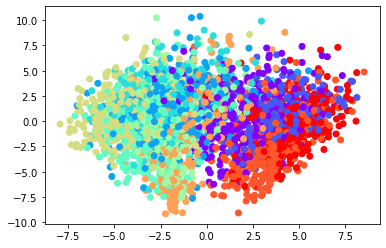

In [17]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
cmap = cm.rainbow(np.linspace(0.0, 1.0, 10))
color = cmap[cls]
x = t_values_reduced[:,0]
y = t_values_reduced[:,1]
plt.scatter(x, y, color=color)
plt.show()

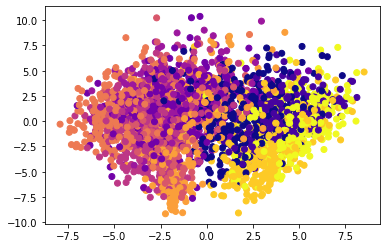

In [18]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
cmap = cm.plasma(np.linspace(0.0, 1.0, 10))
color = cmap[cls]
x = t_values_reduced[:,0]
y = t_values_reduced[:,1]
plt.scatter(x, y, color=color)
plt.show()

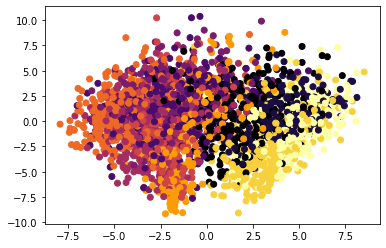

In [19]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
cmap = cm.inferno(np.linspace(0.0, 1.0, 10))
color = cmap[cls]
x = t_values_reduced[:,0]
y = t_values_reduced[:,1]
plt.scatter(x, y, color=color)
plt.show()

# plt.get_cmap

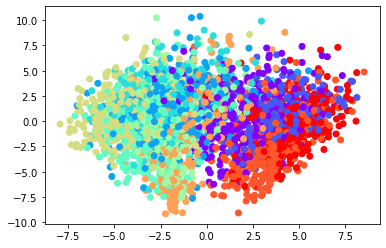

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
name = 'rainbow'
cmap = plt.get_cmap(name)(np.linspace(0.0, 1.0, 10))
color = cmap[cls]
x = t_values_reduced[:,0]
y = t_values_reduced[:,1]
plt.scatter(x, y, color=color)
plt.show()

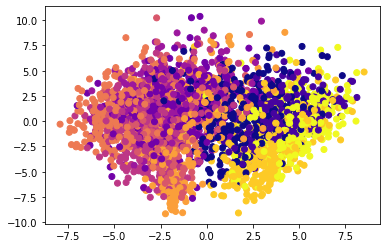

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
name = 'plasma'
cmap = plt.get_cmap(name)(np.linspace(0.0, 1.0, 10))
color = cmap[cls]
x = t_values_reduced[:,0]
y = t_values_reduced[:,1]
plt.scatter(x, y, color=color)
plt.show()

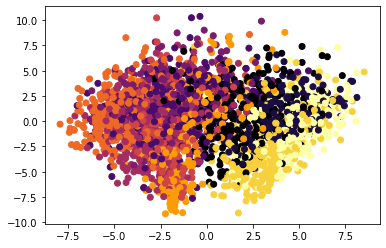

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
name = 'inferno'
cmap = plt.get_cmap(name)(np.linspace(0.0, 1.0, 10))
color = cmap[cls]
x = t_values_reduced[:,0]
y = t_values_reduced[:,1]
plt.scatter(x, y, color=color)
plt.show()

# RGBA

In [23]:
import matplotlib.cm as cm
cmap = cm.rainbow(np.linspace(0.0, 1.0, 10))
print(type(cmap))
print(cmap.shape)
print(cmap)

<class 'numpy.ndarray'>
(10, 4)
[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [2.80392157e-01 3.38158275e-01 9.85162233e-01 1.00000000e+00]
 [6.07843137e-02 6.36474236e-01 9.41089253e-01 1.00000000e+00]
 [1.66666667e-01 8.66025404e-01 8.66025404e-01 1.00000000e+00]
 [3.86274510e-01 9.84086337e-01 7.67362681e-01 1.00000000e+00]
 [6.13725490e-01 9.84086337e-01 6.41213315e-01 1.00000000e+00]
 [8.33333333e-01 8.66025404e-01 5.00000000e-01 1.00000000e+00]
 [1.00000000e+00 6.36474236e-01 3.38158275e-01 1.00000000e+00]
 [1.00000000e+00 3.38158275e-01 1.71625679e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]


In [31]:
import matplotlib.cm as cm
cmap = cm.plasma(np.linspace(0.0, 1.0, 10))
print(type(cmap))
print(cmap.shape)
print(cmap)

<class 'numpy.ndarray'>
(10, 4)
[[0.050383 0.029803 0.527975 1.      ]
 [0.274191 0.012109 0.622722 1.      ]
 [0.447714 0.00208  0.66024  1.      ]
 [0.610667 0.090204 0.619951 1.      ]
 [0.740143 0.213864 0.524216 1.      ]
 [0.846788 0.342551 0.420579 1.      ]
 [0.928329 0.472975 0.326067 1.      ]
 [0.983041 0.624131 0.227937 1.      ]
 [0.991209 0.790537 0.149377 1.      ]
 [0.940015 0.975158 0.131326 1.      ]]


In [24]:
import matplotlib.cm as cm
cmap = cm.inferno(np.linspace(0.0, 1.0, 10))
print(type(cmap))
print(cmap.shape)
print(cmap)

<class 'numpy.ndarray'>
(10, 4)
[[1.46200e-03 4.66000e-04 1.38660e-02 1.00000e+00]
 [1.04551e-01 4.70080e-02 2.53430e-01 1.00000e+00]
 [2.90763e-01 4.56440e-02 4.18637e-01 1.00000e+00]
 [4.72328e-01 1.10547e-01 4.28334e-01 1.00000e+00]
 [6.46260e-01 1.73914e-01 3.78359e-01 1.00000e+00]
 [8.12239e-01 2.66786e-01 2.74661e-01 1.00000e+00]
 [9.29644e-01 4.11479e-01 1.45367e-01 1.00000e+00]
 [9.85315e-01 6.08422e-01 2.42020e-02 1.00000e+00]
 [9.69783e-01 8.20825e-01 2.38686e-01 1.00000e+00]
 [9.88362e-01 9.98364e-01 6.44924e-01 1.00000e+00]]


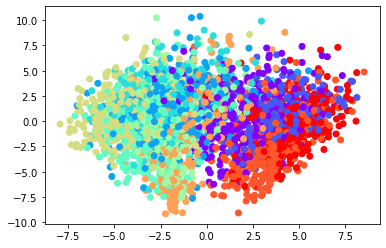

In [25]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
cmap = cm.rainbow(np.linspace(0.0, 1.0, 10))
color = cmap[cls]
x = t_values_reduced[:,0]
y = t_values_reduced[:,1]
plt.scatter(x, y, color=color)
plt.show()

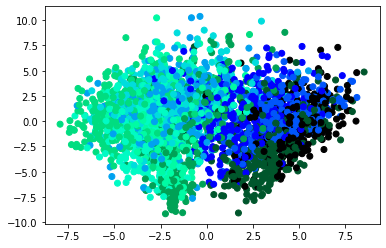

In [26]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
cmap = cm.rainbow(np.linspace(0.0, 1.0, 10))
cmap[:,0] = 0.0
color = cmap[cls]
x = t_values_reduced[:,0]
y = t_values_reduced[:,1]
plt.scatter(x, y, color=color)
plt.show()

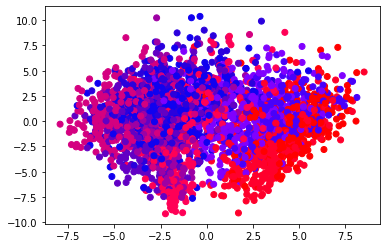

In [27]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
cmap = cm.rainbow(np.linspace(0.0, 1.0, 10))
cmap[:,1] = 0.0
color = cmap[cls]
x = t_values_reduced[:,0]
y = t_values_reduced[:,1]
plt.scatter(x, y, color=color)
plt.show()

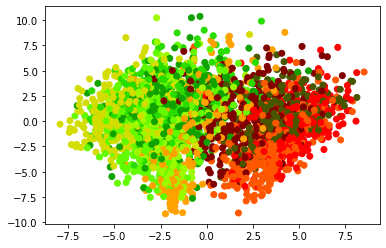

In [28]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
cmap = cm.rainbow(np.linspace(0.0, 1.0, 10))
cmap[:,2] = 0.0
color = cmap[cls]
x = t_values_reduced[:,0]
y = t_values_reduced[:,1]
plt.scatter(x, y, color=color)
plt.show()

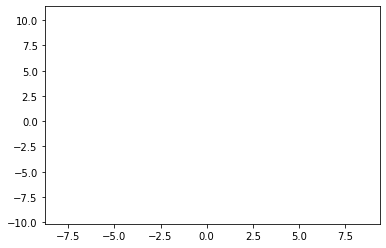

In [29]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
cmap = cm.rainbow(np.linspace(0.0, 1.0, 10))
cmap[:,3] = 0.0
color = cmap[cls]
x = t_values_reduced[:,0]
y = t_values_reduced[:,1]
plt.scatter(x, y, color=color)
plt.show()

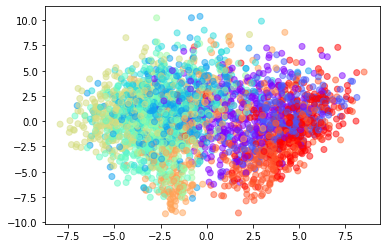

In [30]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
cmap = cm.rainbow(np.linspace(0.0, 1.0, 10))
cmap[:,3] = 0.5
color = cmap[cls]
x = t_values_reduced[:,0]
y = t_values_reduced[:,1]
plt.scatter(x, y, color=color)
plt.show()